<h3>Importing all necessities</h3>

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

<h3>Importing the dataset into a Pandas DataFrame</h3>

In [202]:
df = pd.read_csv('Medicalpremium.csv')

In [203]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


<h3>Fetching information about the datafrane</h3>

In [366]:
df.shape

(986, 12)

In [205]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [206]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


<h3>Using the Height and Weight column to create BMI column</h3>

In [207]:
df['Height(m)'] = df['Height']/100
df['BMI'] = df['Weight'] / (df['Height(m)'] ** 2)
df.drop(columns=['Height'], inplace=True)

In [208]:
cols = list(df.columns)
cols.append(cols.pop(cols.index('PremiumPrice')))
df = df[cols]
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Height(m),BMI,PremiumPrice
0,45,0,0,0,0,57,0,0,0,1.55,23.725286,25000
1,60,1,0,0,0,73,0,0,0,1.80,22.530864,29000
2,36,1,1,0,0,59,0,0,1,1.58,23.634033,23000
3,52,1,1,0,1,93,0,0,2,1.83,27.770313,28000
4,38,0,0,0,1,88,0,0,1,1.66,31.934969,23000


In [209]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Height(m),BMI,PremiumPrice
0,45,0,0,0,0,57,0,0,0,1.55,23.725286,25000
1,60,1,0,0,0,73,0,0,0,1.80,22.530864,29000
2,36,1,1,0,0,59,0,0,1,1.58,23.634033,23000
3,52,1,1,0,1,93,0,0,2,1.83,27.770313,28000
4,38,0,0,0,1,88,0,0,1,1.66,31.934969,23000


<h3>Univariate Analysis</h3>

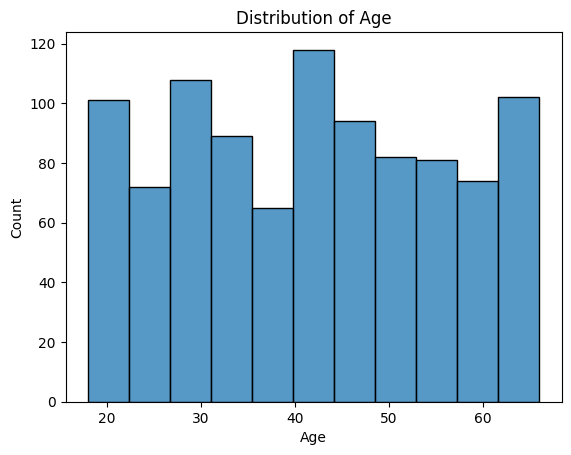

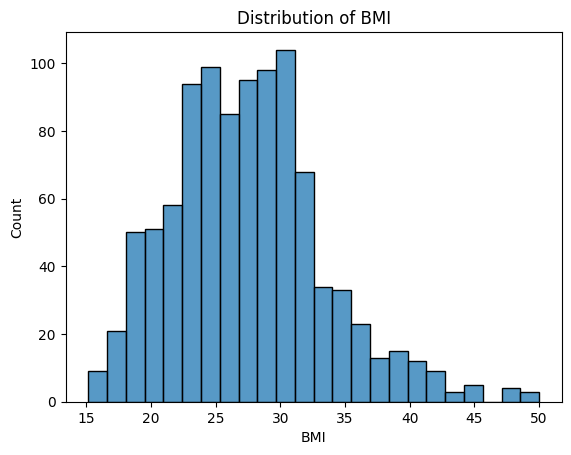

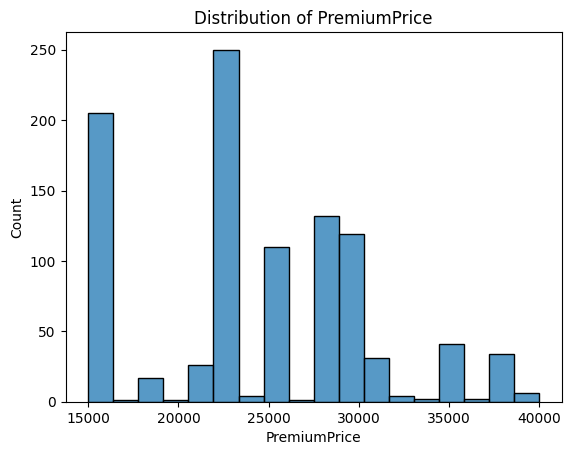

In [210]:
numerical_features = ['Age','BMI','PremiumPrice']
for features in numerical_features:
    sns.histplot(df,x=features)
    plt.title(f'Distribution of {features}')
    plt.show()

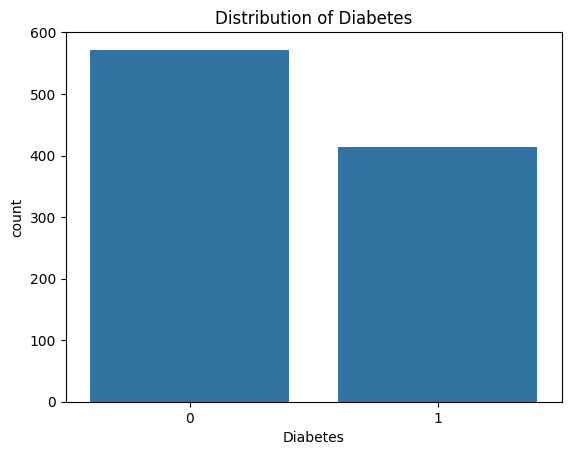

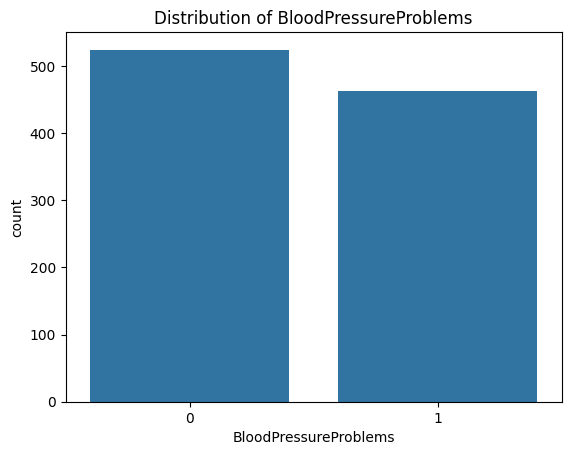

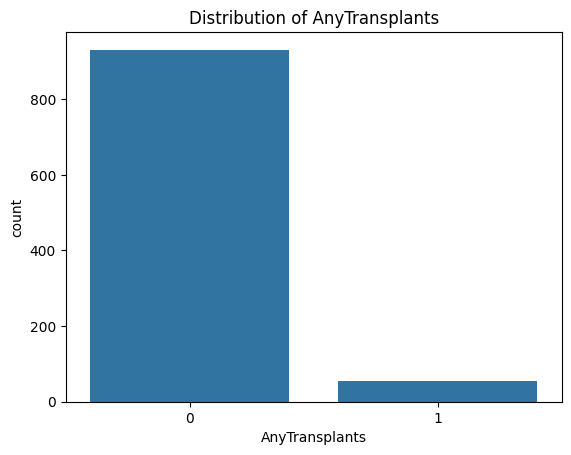

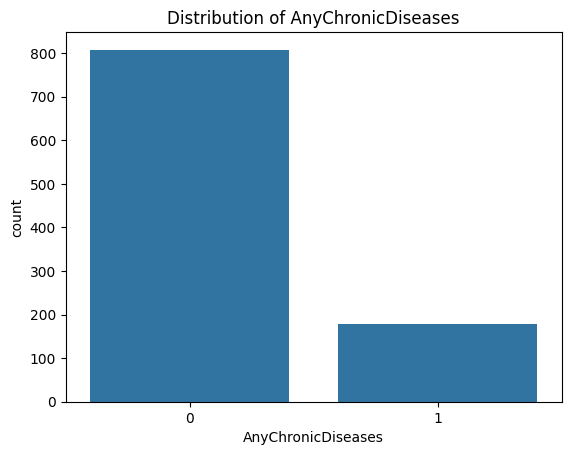

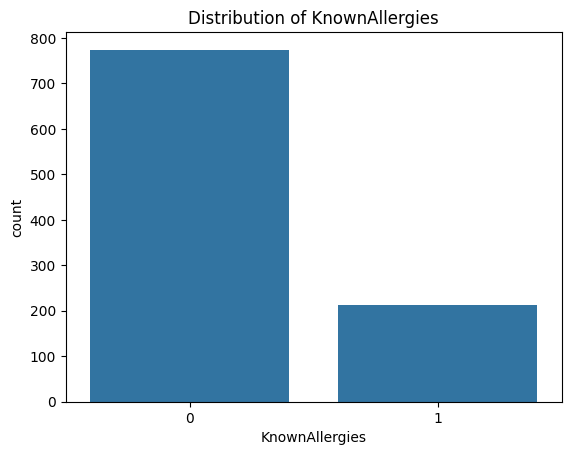

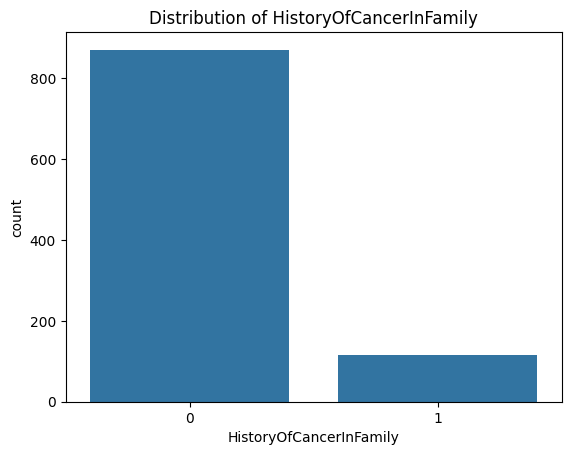

In [211]:
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()


<h3>Bivariate Analysis</h3>

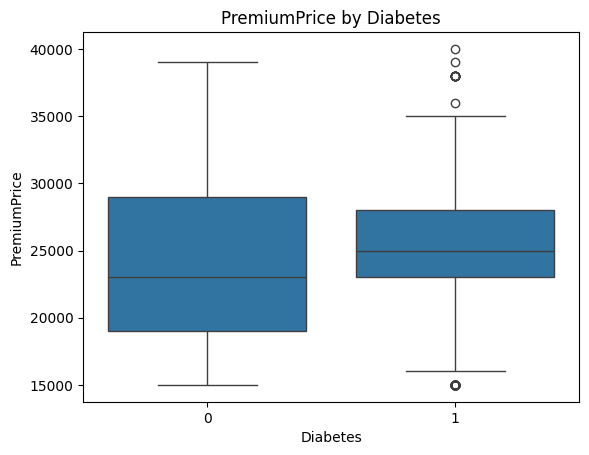

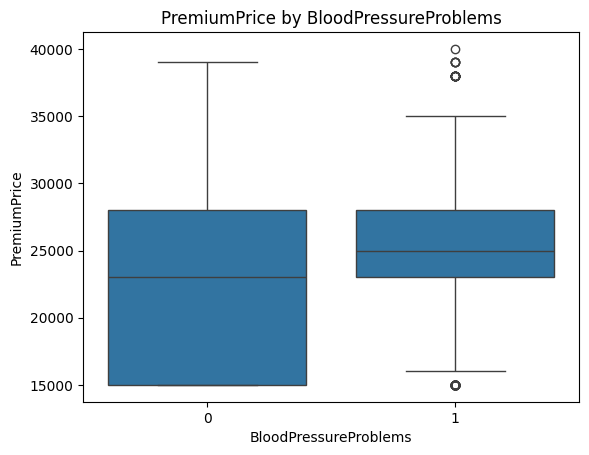

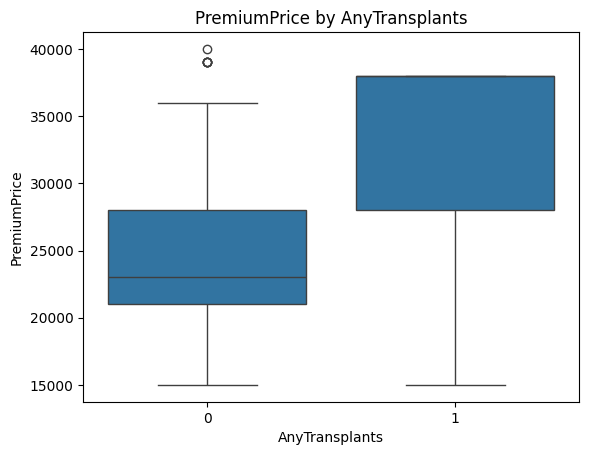

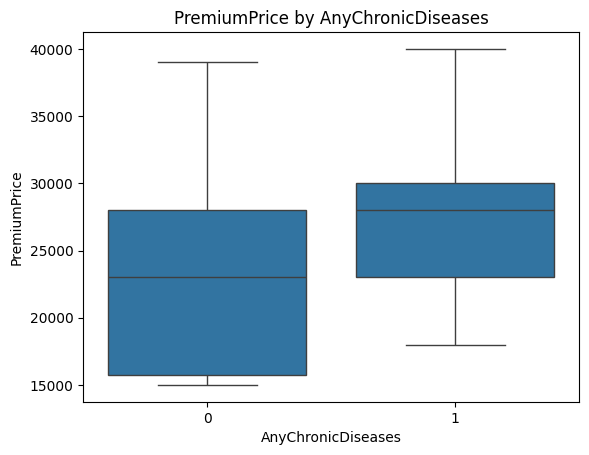

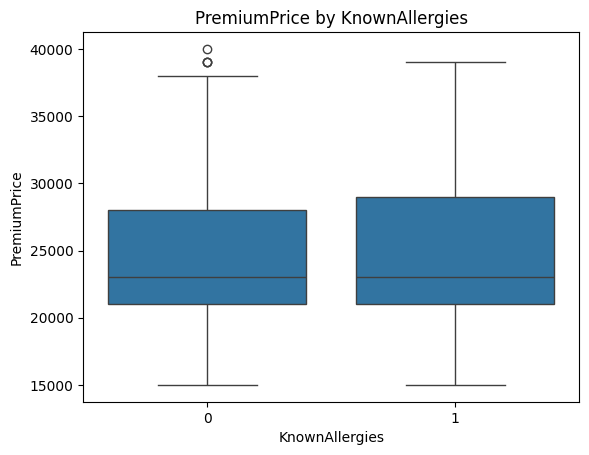

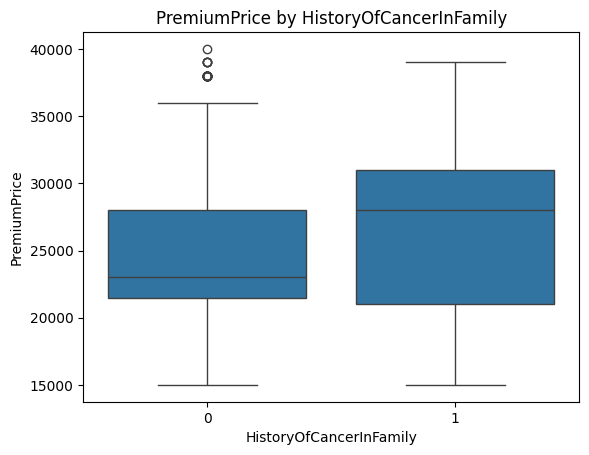

In [212]:
for feature in categorical_features:
    sns.boxplot(x=feature, y='PremiumPrice', data=df)
    plt.title(f'PremiumPrice by {feature}')
    plt.show()


<h3>Multivariate Analysis</h3>

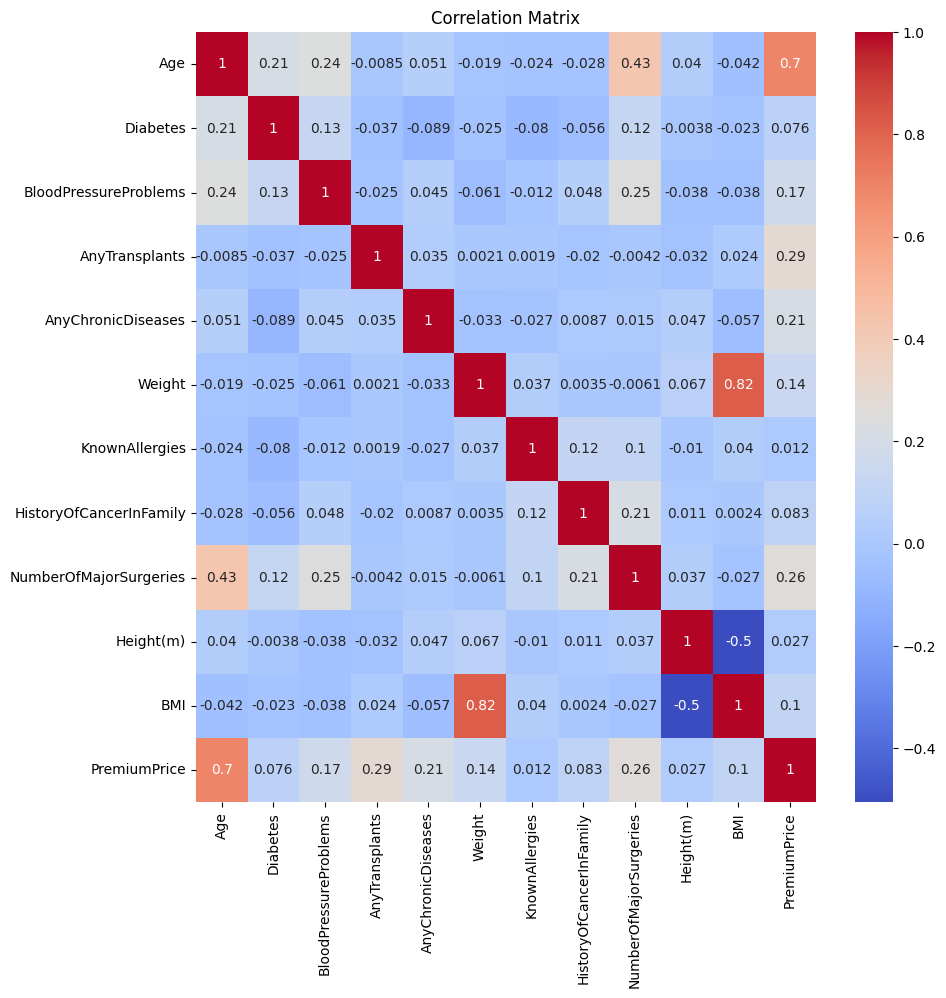

In [213]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<h3>Splitting The Data into Training And Test Sets</h3>

In [370]:
x = df.iloc[:,0:11]
y= df.iloc[:,11]
y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [371]:
x.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Height(m),BMI
0,45,0,0,0,0,57,0,0,0,1.55,23.725286
1,60,1,0,0,0,73,0,0,0,1.80,22.530864
2,36,1,1,0,0,59,0,0,1,1.58,23.634033
3,52,1,1,0,1,93,0,0,2,1.83,27.770313
4,38,0,0,0,1,88,0,0,1,1.66,31.934969


In [356]:
x_train, x_test,  y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=2)

<h3>Applying Random Forest Regressor</h3>

In [363]:
model= RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

<h3>Checking the R2 Score</h3>

In [364]:
y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test)

In [365]:
print("R2 score on Training Data : ",r2_score(y_train,y_train_pred))
print("R2 score on Test Data : ",r2_score(y_test,y_test_pred))

R2 score on Training Data :  0.9712634901834852
R2 score on Test Data :  0.8177284169865982


In [368]:
import pickle

In [369]:
pickle.dump(model,open('RFR.pkl','wb'))